In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [36]:
df = pd.read_csv('epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


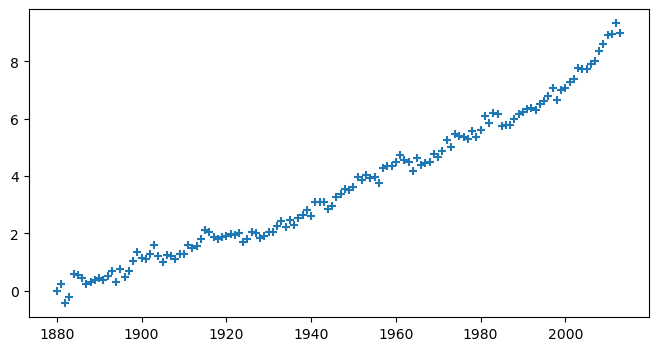

In [37]:
sea_level = df['CSIRO Adjusted Sea Level']
year = df['Year']
plt.figure(figsize=(8,4))
plt.scatter(year, sea_level, marker= '+')

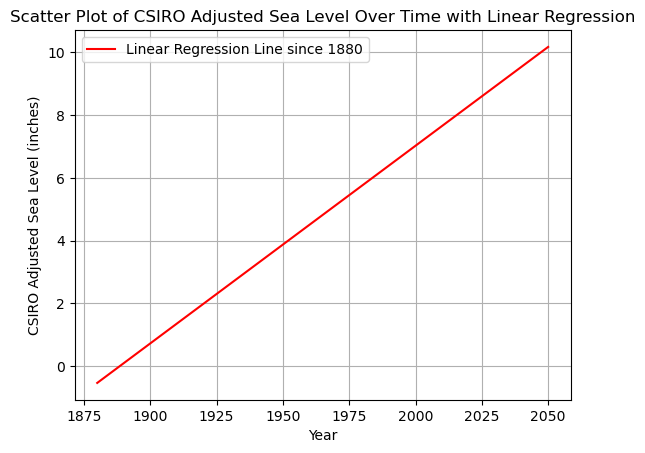

Predicted sea level rise in 2050: 10.18 inches


In [38]:
# Calculate the line of best fit for recent data
slope, intercept, rvalue, pvalue, stderr = linregress(year, sea_level)
years_for_prediction = range(1880, 2051)

# Predict sea level rise for the years 2000 to 2050
sea_level_predicted = [slope*year + intercept for year in years_for_prediction]

plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level (inches)')
plt.title('Scatter Plot of CSIRO Adjusted Sea Level Over Time with Linear Regression')

plt.plot(years_for_prediction,sea_level_predicted, color='r', label='Linear Regression Line since 1880')

plt.grid(True)
plt.legend()


sea_level_2050 = slope*2050 + intercept
plt.show()
print(f"Predicted sea level rise in 2050: {sea_level_2050:.2f} inches")


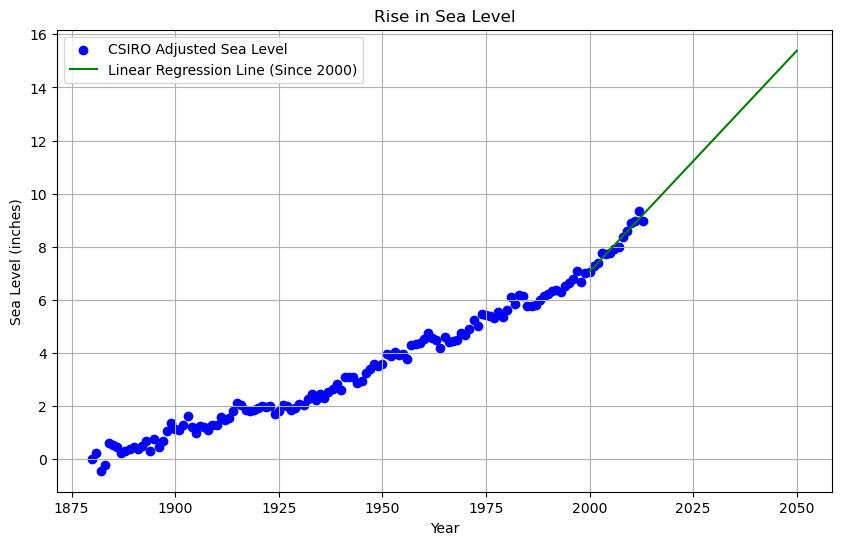

In [39]:
# Filter data for the year 2000 and later
recent_data = df[df['Year'] >= 2000]

# Extract the Year and CSIRO Adjusted Sea Level columns for recent data
recent_year = recent_data['Year']
recent_sea_level = recent_data['CSIRO Adjusted Sea Level']

# Calculate the line of best fit for recent data
slope_recent, intercept_recent,rvalue_recent, pvalue_recent, stderr_recent = linregress(recent_year, recent_sea_level)

# Predict sea level rise for the years 2000 to 2050
years_for_prediction_recent = range(2000, 2051)
sea_level_predicted_recent = [slope_recent * year + intercept_recent for year in years_for_prediction_recent]

# Plot the line of best fit for recent data
plt.figure(figsize=(10, 6))
plt.scatter(year, sea_level, color='b', label='CSIRO Adjusted Sea Level')
plt.plot(years_for_prediction_recent, sea_level_predicted_recent, color='g', label='Linear Regression Line (Since 2000)')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend()
plt.grid(True)
plt.show()

